ENGR-E-533 Deep Learning Systems

Assignment 3

Written by Krish Hemant Mhatre

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd
import keras
import librosa
import pickle
import os

# Problem 1

Baseline Model

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) / 255.
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) / 255.

In [ ]:
def create_model():
  model = keras.models.Sequential()
  activation = 'sigmoid'
  initializer = keras.initializers.GlorotUniform()
  model.add(keras.layers.InputLayer(input_shape=(784)))
  model.add(keras.layers.Dense(units=1024, activation=activation, kernel_initializer=initializer))
  model.add(keras.layers.Dense(units=1024, activation=activation, kernel_initializer=initializer))
  model.add(keras.layers.Dense(units=1024, activation=activation, kernel_initializer=initializer))
  model.add(keras.layers.Dense(units=1024, activation=activation, kernel_initializer=initializer))
  model.add(keras.layers.Dense(units=1024, activation=activation, kernel_initializer=initializer))
  model.add(keras.layers.Dense(units=10, activation='softmax'))
  return model
model = create_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, epochs=50, batch_size=300, validation_split=0.2)

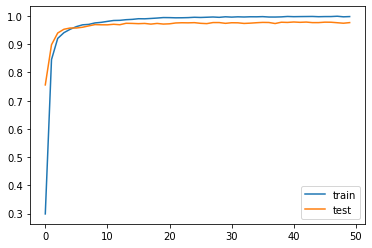

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
path = '/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/baseline.hd5'

In [ ]:
model.save(path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/baseline.hd5/assets


In [ ]:
model = keras.models.load_model(path)

In [ ]:
def compress_model(model, D):
  compressed_model = create_model()
  weight_list = []
  for i in range(len(compressed_model.layers)-1):
    W = model.get_weights()[i*2]
    B = model.get_weights()[(i*2)+1]
    S, U, V = tf.linalg.svd(W)
    W_h = U[:, :D] @ np.diag(S)[:D, :D] @ np.array(V)[:, :D].T
    weight_list.append(W_h)
    weight_list.append(B)
  weight_list.append(model.get_weights()[-2])
  weight_list.append(model.get_weights()[-1])
  compressed_model.set_weights(weight_list)
  return compressed_model

In [ ]:
def test_accuracy(model):
  model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
  accuracy = model.evaluate(x_test, y_test)
  return accuracy[1]

In [ ]:
dims = [10, 20, 50, 100, 200]
accuracies = []
for d in dims:
  model1 = compress_model(model, D=d)
  acc = test_accuracy(model1)
  accuracies.append([d, acc])

313/313 [==============================] - 1s 2ms/step - loss: 0.1311 - accuracy: 0.9762


In [ ]:
accuracies

[[10, 0.804099977016449],
 [20, 0.9574000239372253],
 [50, 0.9749000072479248],
 [100, 0.9767000079154968],
 [200, 0.9761999845504761]]

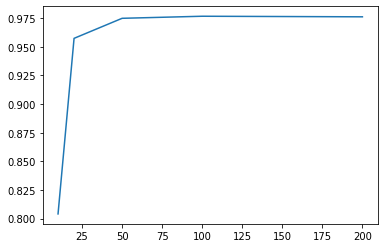

In [ ]:
accuracies = np.array(accuracies)
plt.plot(accuracies[:, 0], accuracies[:, 1])

# Problem 2

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) / 255.
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) / 255.

In [ ]:
path = '/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/baseline.hd5'
model = keras.models.load_model(path)

In [ ]:
new_model = keras.models.Sequential()
new_model.add(keras.layers.InputLayer(input_shape=(784)))
new_model.add(keras.layers.Dense(units=20, activation=None, use_bias=False))
new_model.add(keras.layers.Dense(units=1024, activation='relu', use_bias=True))
new_model.add(keras.layers.Dense(units=20, activation=None, use_bias=False))
new_model.add(keras.layers.Dense(units=1024, activation='relu', use_bias=True))
new_model.add(keras.layers.Dense(units=20, activation=None, use_bias=False))
new_model.add(keras.layers.Dense(units=1024, activation='relu', use_bias=True))
new_model.add(keras.layers.Dense(units=20, activation=None, use_bias=False))
new_model.add(keras.layers.Dense(units=1024, activation='relu', use_bias=True))
new_model.add(keras.layers.Dense(units=20, activation=None, use_bias=False))
new_model.add(keras.layers.Dense(units=1024, activation='relu', use_bias=True))
new_model.add(keras.layers.Dense(units=10, activation='softmax'))
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 20)                15680     
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_57 (Dense)             (None, 20)                20480     
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_59 (Dense)             (None, 20)                20480     
_________________________________________________________________
dense_60 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_61 (Dense)             (None, 20)               

In [ ]:
len(new_model.get_weights())

17

In [ ]:
D = 20
weight_list = []
for i in range(len(model.layers)-1):
  W = model.get_weights()[i*2]
  B = model.get_weights()[(i*2)+1]
  S, U, V = tf.linalg.svd(W)
  weight_list.append(U[:, :D])
  weight_list.append(np.diag(S)[:D, :D] @ np.array(V)[:, :D].T)
  weight_list.append(B)
weight_list.append(model.get_weights()[-2])
weight_list.append(model.get_weights()[-1])

In [ ]:
print(len(weight_list))
print(np.shape(weight_list[0]), np.shape(new_model.get_weights()[0]))

17
(784, 20) (784, 20)


In [ ]:
new_model.set_weights(weight_list)

In [ ]:
new_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
new_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 317.0490 - accuracy: 0.7910


[317.04901123046875, 0.7910000085830688]

In [ ]:
history = new_model.fit(x=x_train, y=y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 18.7631 - accuracy: 0.9333
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 1.0973 - accuracy: 0.9301
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4421 - accuracy: 0.9312
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2997 - accuracy: 0.9391
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2377 - accuracy: 0.9462
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1954 - accuracy: 0.9527
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1658 - accuracy: 0.9576
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1457 - accuracy: 0.9619
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1322 - accuracy: 0.9654
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1124 - accuracy: 0.969

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

# Problem 3

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) / 255.
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) / 255.

In [ ]:
path = '/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/baseline.hd5'
model = keras.models.load_model(path)

In [ ]:
@tf.custom_gradient
def custom_op(W):
  D = 20
  S, U, V = tf.linalg.svd(W)
  W_h = U[:, :D] @ tf.linalg.diag(S)[:D, :D] @ tf.transpose(V[:, :D])

  def custom_grad(dy):
    return dy*1.0
  return W_h, custom_grad

In [ ]:
class CustomLayer(keras.layers.Layer):
  def __init__(self, units=1024, input_dim=1024):
    super(CustomLayer, self).__init__()
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype="float32"), trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(initial_value=b_init(shape=(units,), dtype="float32"), trainable=True)

  def call(self, x):
    W = self.w
    B = self.b
    W_h = custom_op(W)
    return (tf.cast(x, tf.float32) @ W_h) + B

In [ ]:
model3 = keras.models.Sequential()
model3.add(keras.layers.InputLayer(input_shape=(784)))
model3.add(CustomLayer(units=1024, input_dim=784))
model3.add(CustomLayer(units=1024))
model3.add(CustomLayer(units=1024))
model3.add(CustomLayer(units=1024))
model3.add(CustomLayer(units=1024))
model3.add(keras.layers.Dense(units=10, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_layer_10 (CustomLayer (None, 1024)              803840    
_________________________________________________________________
custom_layer_11 (CustomLayer (None, 1024)              1049600   
_________________________________________________________________
custom_layer_12 (CustomLayer (None, 1024)              1049600   
_________________________________________________________________
custom_layer_13 (CustomLayer (None, 1024)              1049600   
_________________________________________________________________
custom_layer_14 (CustomLayer (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
Non-trainable params: 0
____________________________________________

In [ ]:
model3.set_weights(model.get_weights())

In [ ]:
model3.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model3.fit(x=x_train, y=y_train, epochs=15, batch_size=6400, validation_split=0.2)

Epoch 1/15
160/160 [==============================] - 468s 3s/step - loss: 204111.6094 - accuracy: 0.8297 - val_loss: 42571.6445 - val_accuracy: 0.8963
Epoch 2/15
160/160 [==============================] - 465s 3s/step - loss: 28142.3203 - accuracy: 0.8925 - val_loss: 19226.7305 - val_accuracy: 0.8903
Epoch 3/15
160/160 [==============================] - 465s 3s/step - loss: 12861.3691 - accuracy: 0.8907 - val_loss: 9635.0049 - val_accuracy: 0.8868
Epoch 4/15
160/160 [==============================] - 461s 3s/step - loss: 9350.0830 - accuracy: 0.8686 - val_loss: 7729.6719 - val_accuracy: 0.8798
Epoch 5/15
160/160 [==============================] - 463s 3s/step - loss: 5993.6655 - accuracy: 0.8751 - val_loss: 4244.0459 - val_accuracy: 0.8836
Epoch 6/15
160/160 [==============================] - 457s 3s/step - loss: 4273.0732 - accuracy: 0.8703 - val_loss: 3697.8840 - val_accuracy: 0.8673
Epoch 7/15
160/160 [==============================] - 461s 3s/step - loss: 3561.4060 - accuracy: 0.8

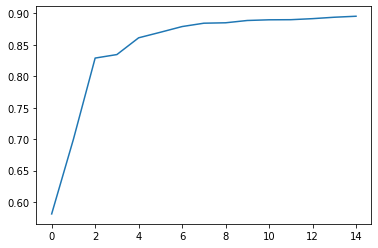

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.show()

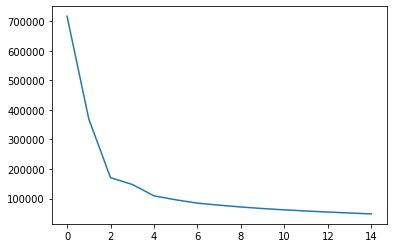

In [ ]:
plt.plot(history.history['val_loss'])
plt.show()

# Problem 4

In [ ]:
def get_data(folder_path, num_signals=1200, flag='tr'):
  X = np.zeros((int(num_signals), 513, 178))
  N = np.zeros((int(num_signals), 513, 178))
  S = np.zeros((int(num_signals), 513, 178))
  for i in range(0, num_signals):
    file_name = str(i)
    for j in range(4 - len(str(i))):
      file_name = '0' + file_name
    x, _ = librosa.load(os.path.join(folder_path, flag, flag + 'x' + file_name + '.wav'), sr=None)
    n, _ = librosa.load(os.path.join(folder_path, flag, flag + 'n' + file_name + '.wav'), sr=None)
    s, _ = librosa.load(os.path.join(folder_path, flag, flag + 's' + file_name + '.wav'), sr=None)

    x = np.abs(librosa.stft(x, n_fft=1024, hop_length=512))
    n = np.abs(librosa.stft(n, n_fft=1024, hop_length=512))
    s = np.abs(librosa.stft(s, n_fft=1024, hop_length=512))

    X[i, :x.shape[0], :x.shape[1]] = x
    N[i, :n.shape[0], :n.shape[1]] = n
    S[i, :s.shape[0], :s.shape[1]] = s

    print(i)
  return X, N, S

In [ ]:
folder_path = '/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/timit-homework'

In [ ]:
X, N, S = get_data(folder_path=folder_path, num_signals=1200)
with open('/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/variables/audio_data.pkl', 'wb') as f:
  pickle.dump([X, N, S], f, protocol=-1)

In [ ]:
with open('/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/variables/audio_data.pkl', 'rb') as f:
  X, N, S = pickle.load(f)

In [ ]:
X_T = np.zeros((1200, 178, 513))
for i in range(len(X)):
  X_T[i] = X[i].T

In [ ]:
def get_IBM(S, N):
  M = []
  for i in range(len(S)):
    m = 1 * (S[i] > N[i])
    M.append(m)
  return np.array(M)

In [ ]:
M = get_IBM(S, N)
M.shape

(1200, 513, 178)

In [ ]:
M_T = np.zeros((1200, 178, 513))
for i in range(len(M)):
  M_T[i] = M[i].T

In [ ]:
del X, M, S, N

In [ ]:
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.Input(shape=(None, 513)))
lstm_model.add(keras.layers.LSTM(units=513, return_sequences=True))
lstm_model.add(keras.layers.LSTM(units=513, return_sequences=True))
lstm_model.add(keras.layers.LSTM(units=513, return_sequences=True))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 513)         2107404   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 513)         2107404   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 513)         2107404   
Total params: 6,322,212
Trainable params: 6,322,212
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer='adam',
    metrics=[keras.metrics.MeanSquaredError()],
)
history = lstm_model.fit(X_T, M_T, batch_size=10, epochs=25, validation_split=0.2)

Epoch 1/25
96/96 [==============================] - 8s 88ms/step - loss: 0.1345 - mean_squared_error: 0.1345 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 2/25
96/96 [==============================] - 7s 78ms/step - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.1115 - val_mean_squared_error: 0.1115
Epoch 3/25
96/96 [==============================] - 8s 79ms/step - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.1000 - val_mean_squared_error: 0.1000
Epoch 4/25
96/96 [==============================] - 8s 79ms/step - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 5/25
96/96 [==============================] - 8s 80ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 6/25
96/96 [==============================] - 8s 79ms/step - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 7/25
96/96 [================

In [ ]:
lstm_model.save('/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/lstm_model')

In [ ]:
lstm_model = keras.models.load_model('/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/lstm_model')

In [ ]:
X_test = np.zeros((int(400), 513, 195))
for i in range(400):
  print(i)
  file_name = str(i)
  for j in range(4 - len(str(i))):
    file_name = '0' + file_name
  x, _ = librosa.load(os.path.join(folder_path, 'te', 'tex' + file_name + '.wav'), sr=None)
  x = np.abs(librosa.stft(x, n_fft=1024, hop_length=512))

  X_test[i, :x.shape[0], :x.shape[1]] = x


In [ ]:
with open('/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/variables/test_data.pkl', 'wb') as f:
  pickle.dump([X_test], f, protocol=-1)

In [ ]:
with open('/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/variables/audio_data.pkl', 'rb') as f:
  X_test = pickle.load(f)

In [ ]:
for i in range(len(X_test[0])):
  tex_val = np.array([X_test[0][i].T])
  mag_tex = np.abs(tex_val)
  tex_pred = lstm_model.predict(mag_tex)
  tex_out = np.multiply(tex_pred, tex_val)
  tex_out = tex_out.T[:, :, 0]
  audio_out = librosa.istft(tex_out, hop_length=512, win_length=1024)
  filecount = str(i)
  for j in range(4 - len(str(i))):
      filecount = '0' + filecount
  out_path = '/content/drive/MyDrive/Academics/Fall 2020/Deep Learning/HW3/Test_output/tes' + filecount + '.wav'
  librosa.output.write_wav(out_path, audio_out, sr=16000)

Exception ignored in: <bound method Wave_write.__del__ of <wave.Wave_write object at 0x7fe1260cb080>>
Traceback (most recent call last):
  File "/usr/lib/python3.6/wave.py", line 316, in __del__
    self.close()
  File "/usr/lib/python3.6/wave.py", line 434, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.6/wave.py", line 454, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


# Problem 5

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = (x_train / 255., x_test / 255.)

In [ ]:
tmp = x_train[0]
img = []
for i in range(4):
  for j in range(4):
    img.append(tmp[7*i:7*(i+1), 7*j:7*(j+1)])

In [ ]:
np.array(img).shape

(16, 7, 7)

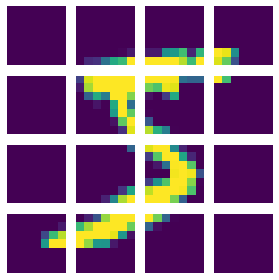

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(4, 4))
k = 0
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(img[k])
    k += 1
    ax[i, j].set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
def process_image_data(data):
  new_x_train = []
  new_y_train = []
  for k in range(len(data)):
    tmp1 = []
    for i in range(4):
      for j in range(4):
        tmp1.append(data[k][7*i:7*(i+1), 7*j:7*(j+1)])
    new_x_train.append(tmp1[:-1])
    new_y_train.append(tmp1[1:])
  return np.array(new_x_train), np.array(new_y_train)

In [ ]:
(new_x_train, new_y_train) = process_image_data(x_train)
new_x_train = np.array(new_x_train).reshape(len(new_x_train), 15, 49)
new_y_train = np.array(new_y_train).reshape(len(new_y_train), 15, 49)

In [ ]:
(new_x_test, new_y_test) = process_image_data(x_test)
new_x_test = np.array(new_x_test).reshape(len(x_test), 15, 49)
new_y_test = np.array(new_y_test).reshape(len(y_test), 15, 49)

In [ ]:
new_x_train.shape

(60000, 15, 49)

In [ ]:
gen_model = keras.models.Sequential()
gen_model.add(keras.layers.Input(shape=(None, 49)))
gen_model.add(keras.layers.LSTM(units=64, return_sequences=True))
gen_model.add(keras.layers.LSTM(units=64, return_sequences=True))
gen_model.add(keras.layers.Dense(units=49, activation='relu'))
gen_model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, None, 64)          29184     
_________________________________________________________________
lstm_93 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
dense_37 (Dense)             (None, None, 49)          3185      
Total params: 65,393
Trainable params: 65,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gen_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
gen_model.fit(new_x_train, new_y_train, batch_size=100, epochs=50, validation_data=(new_x_test, new_y_test))

Epoch 1/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0631 - mse: 0.0631 - val_loss: 0.0472 - val_mse: 0.0472
Epoch 2/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 3/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 4/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 5/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 6/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 8/50
600/600 [==============================] - 3s 5ms/step - loss: 0.

In [ ]:
def get_prediction(test_data):
  y = test_data.reshape(1, 15, 49)
  predictions = []
  predictions.append(y[:, :8, :])
  predictions = np.array(predictions).reshape((1, 8, 49))
  for i in range(8):
    pred = gen_model.predict(predictions)
    predictions = np.concatenate((predictions, pred[-1, -1].reshape((1, 1, 49))), axis=1)
  predictions = predictions.reshape(16, 7, 7)
  imgn = np.zeros((28, 28))
  k = 0
  for i in range(4):
    for j in range(4):
      imgn[i*7:(i+1)*7, j*7:(j+1)*7] = predictions[k]
      k += 1
  return imgn

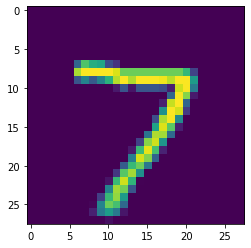

In [ ]:
imgn = get_prediction(new_x_test[0])
plt.imshow(imgn)

In [ ]:
data_ix = []
for i in range(10):
  tmp = []
  for j in range(len(y_test)):
    if len(tmp) < 10:
      if y_test[j] == i:
        tmp.append(j)
    elif len(tmp) == 10:
      data_ix.append(tmp)
      break
data_ix = np.array(data_ix).reshape(100)

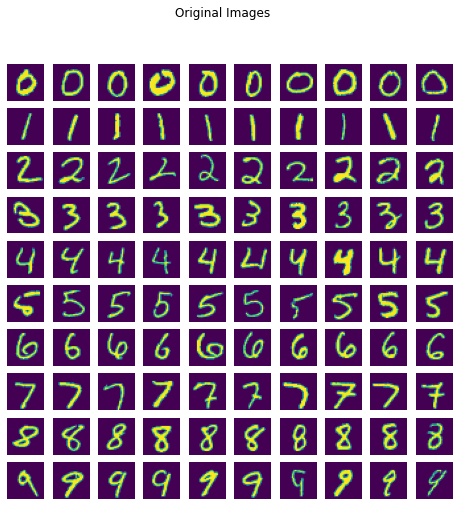

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
k = 0
for i in range(10):
  for j in range(10):
    ax[i, j].imshow(x_test[data_ix[k]])
    ax[i, j].set_axis_off()
    k += 1
plt.suptitle('Original Images')
plt.show()

In [ ]:
generated_imgs = []
for ix in data_ix:
  generated_imgs.append(get_prediction(new_x_test[ix]))

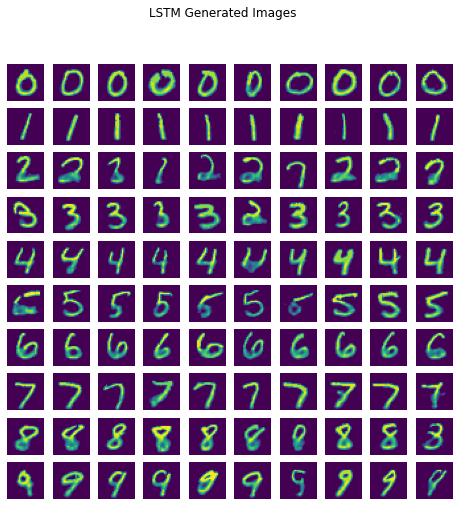

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
k = 0
for i in range(10):
  for j in range(10):
    ax[i, j].imshow(generated_imgs[k])
    ax[i, j].set_axis_off()
    k += 1
plt.suptitle('LSTM Generated Images')
plt.show()

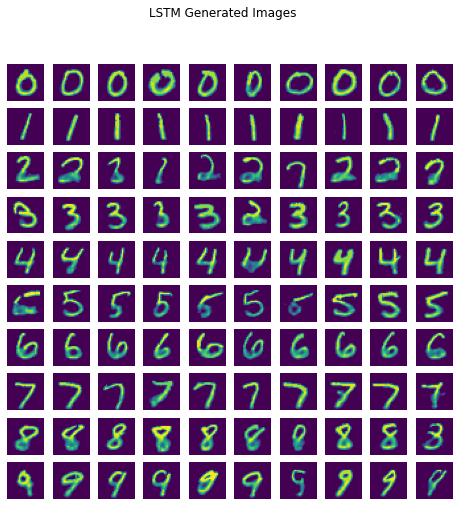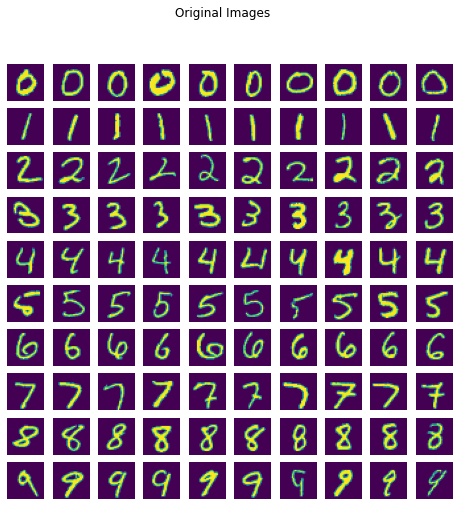